In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from scipy import stats

In [59]:
data = pd.read_csv('marketing_customer_analysis.csv')

def dealing_data(data):
    data.drop(['Unnamed: 0'],axis=1,inplace=True)
    cols = []
    for column in range(len(data.columns)):
        cols.append(data.columns[column].lower())
    data.columns = cols
    data.drop(['vehicle type'],axis=1,inplace=True)
    data.dropna(subset = ['state','response','months since last claim','number of open complaints','vehicle class','vehicle size'],inplace=True)
    data['effective to date']= pd.to_datetime(data['effective to date'], errors='coerce')
    data['month'] = pd.DatetimeIndex(data['effective to date']).month
    response_count= data['response'].value_counts()
    response_count.plot(kind ='bar')  
    plt.title('Total Number of Responses')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.show()
    response_rate_by_channel = (data.groupby('sales channel')['response'].value_counts(normalize=True).rename('percentage')*100).reset_index()
    sns.catplot(x='sales channel', y='percentage', hue='response', kind='bar', data= response_rate_by_channel)
    plt.show
    bins = [0,500,1000,1500,2000,2500,3000]
    data['total claim amount bins'] = pd.cut(data['total claim amount'], bins)
    reprate_total_claim_amount = (data['response'].groupby(data['total claim amount bins']).value_counts(normalize=True)*100).reset_index(name = 'Percentage %')
    sns.catplot(x='total claim amount bins', y='Percentage %', hue='response', kind='bar', data=reprate_total_claim_amount)
    plt.show
    data['income bins'] = pd.cut(data['income'],bins=[0, 25000, 50000, 75000, 100000])
    reprat_income = (data['response'].groupby(data['income bins']).value_counts(normalize=True)*100).reset_index(name='Percentage %')
    sns.catplot(x='income bins', y='Percentage %', hue='response', kind='bar', data=reprat_income)
    plt.show
    numerical = data._get_numeric_data()
    categoricals = data.select_dtypes('object')
    sns.pairplot(numerical)
    plt.show()
    sns.boxplot(x='customer lifetime value',data=numerical)
    plt.show()
    sns.boxplot(x='income',data=numerical)
    plt.show()
    sns.boxplot(x='monthly premium auto',data=numerical)
    plt.show()
    sns.boxplot(x='months since last claim',data=numerical)
    plt.show()
    sns.boxplot(x='months since policy inception',data=numerical)
    plt.show()
    sns.boxplot(x='number of policies',data=numerical)
    plt.show()
    sns.boxplot(x='total claim amount',data=numerical)
    plt.show()
    sns.histplot(numerical['customer lifetime value'],bins=100)
    plt.show()
    sns.histplot(numerical['income'],bins=100)
    plt.show()
    sns.histplot(numerical['monthly premium auto'],bins=100)
    plt.show()
    sns.histplot(numerical['months since last claim'],bins=100)
    plt.show()
    sns.histplot(numerical['months since policy inception'],bins=100)
    plt.show()
    sns.histplot(numerical['number of policies'],bins=100)
    plt.show()
    sns.histplot(numerical['total claim amount'],bins=100)
    plt.show()
    sns.heatmap(numerical.corr(),annot=True)  
    plt.show()
    X = numerical.drop(["total claim amount"],axis=1)
    Y = numerical["total claim amount"]
    stats.boxcox(X['customer lifetime value'])
    arr, lmbda = stats.boxcox(X['customer lifetime value'])
    sns.histplot(arr)
    plt.show()
    X['income_temp'] = np.where(X['income'] < 0, 0,X['income'])
    X['income'].mean()
    X['income_temp'] = X['income_temp'].replace(0,X['income'].mean())
    stats.boxcox(X['income_temp'])
    arr1, lmbda = stats.boxcox(X['income_temp'])
    sns.histplot(arr1)
    plt.show()
    stats.boxcox(X['monthly premium auto'])
    arr2, lmbda = stats.boxcox(X['monthly premium auto'])
    sns.histplot(arr2)
    plt.show()
    X['mslc_temp'] = np.where(X['months since last claim'] < 0, 0,X['months since last claim']) 
    X['months since last claim'].mean()
    X['mslc_temp'] = X['mslc_temp'].replace(0,X['months since last claim'].mean())
    stats.boxcox(X['mslc_temp'])
    arr3, lmbda = stats.boxcox(X['mslc_temp'])
    sns.histplot(arr3)
    plt.show()
    X['mspi_temp'] = np.where(X['months since policy inception'] < 0, 0,X['months since policy inception']) 
    X['months since policy inception'].mean()
    X['mspi_temp'] = X['mspi_temp'].replace(0,X['months since policy inception'].mean())
    stats.boxcox(X['mspi_temp'])
    arr4, lmbda = stats.boxcox(X['mspi_temp'])
    sns.histplot(arr4)
    plt.show()
    X['nop_temp'] = np.where(X['number of open complaints'] < 0, 0,X['number of open complaints']) 
    X['number of open complaints'].mean()
    X['nop_temp'] = X['nop_temp'].replace(0,X['number of open complaints'].mean())
    stats.boxcox(X['nop_temp'])
    arr5, lmbda = stats.boxcox(X['nop_temp'])
    sns.histplot(arr5)
    plt.show()
    stats.boxcox(X['number of policies'])
    arr6, lmbda = stats.boxcox(X['number of policies'])
    sns.histplot(arr6)
    plt.show()
    stats.boxcox(X['month'])
    arr7, lmbda = stats.boxcox(X['month'])
    sns.histplot(arr7)
    plt.show()
    categoricals.drop(['customer'],axis=1,inplace=True)
    for col in categoricals:
        categoricals[col +'_label']= LabelEncoder().fit(categoricals[col]).transform(categoricals[col])
    num_categorical = categoricals._get_numeric_data()
 
    final_data = pd.DataFrame(pd.concat([X,num_categorical],axis=1))
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100) 
    model = sm.OLS(y_train,X_train).fit()
    predictions = model.predict(X_test)
    r2 = r2_score(y_test,predictions)
    print('r2_score :', r2)
    mse = mean_squared_error(y_test, predictions)
    print('mse :', mse)
    rmse = math.sqrt(mse) 
    print('rmse:', rmse)
    mae= mean_absolute_error(y_test,predictions)
    print('mae: ', mae)


    
    

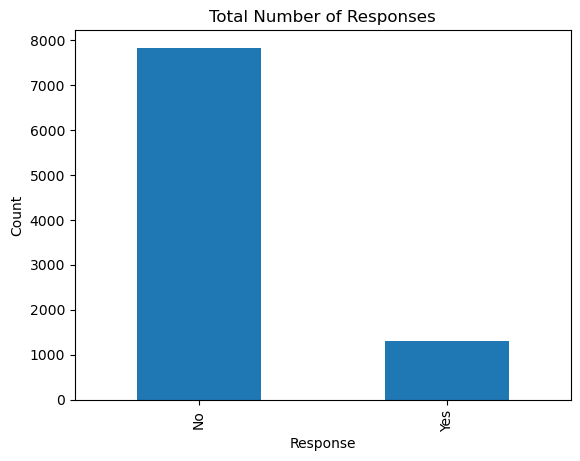

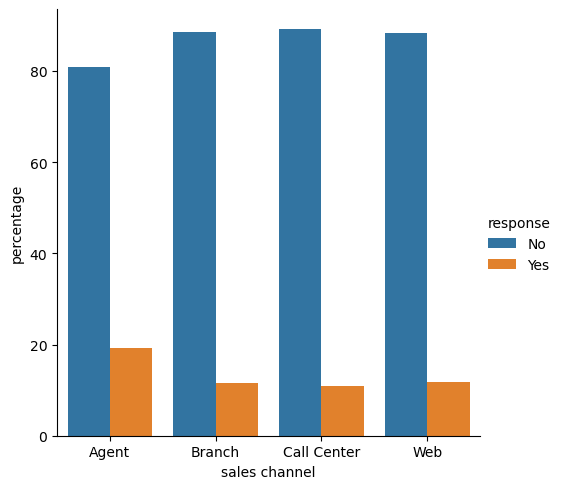

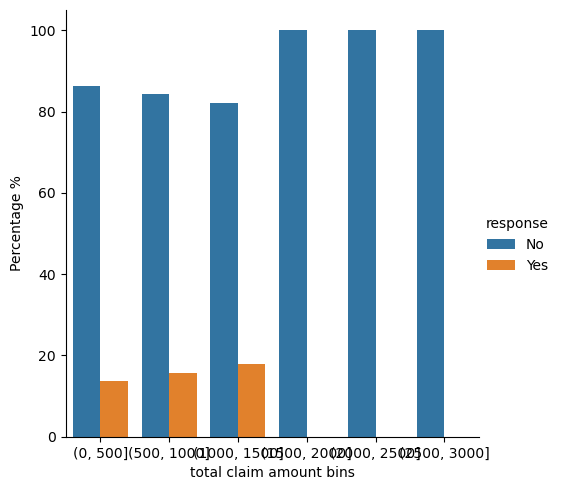

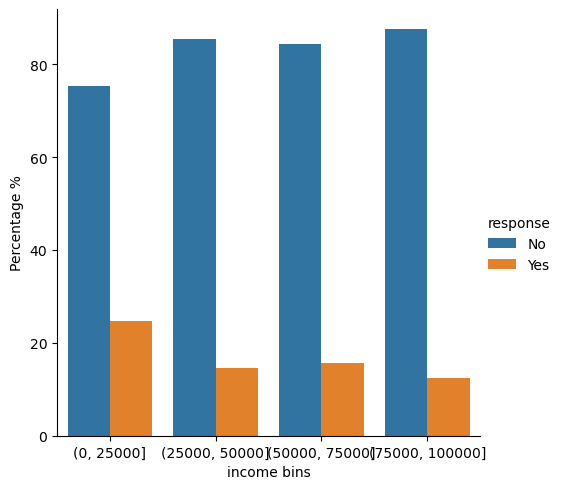

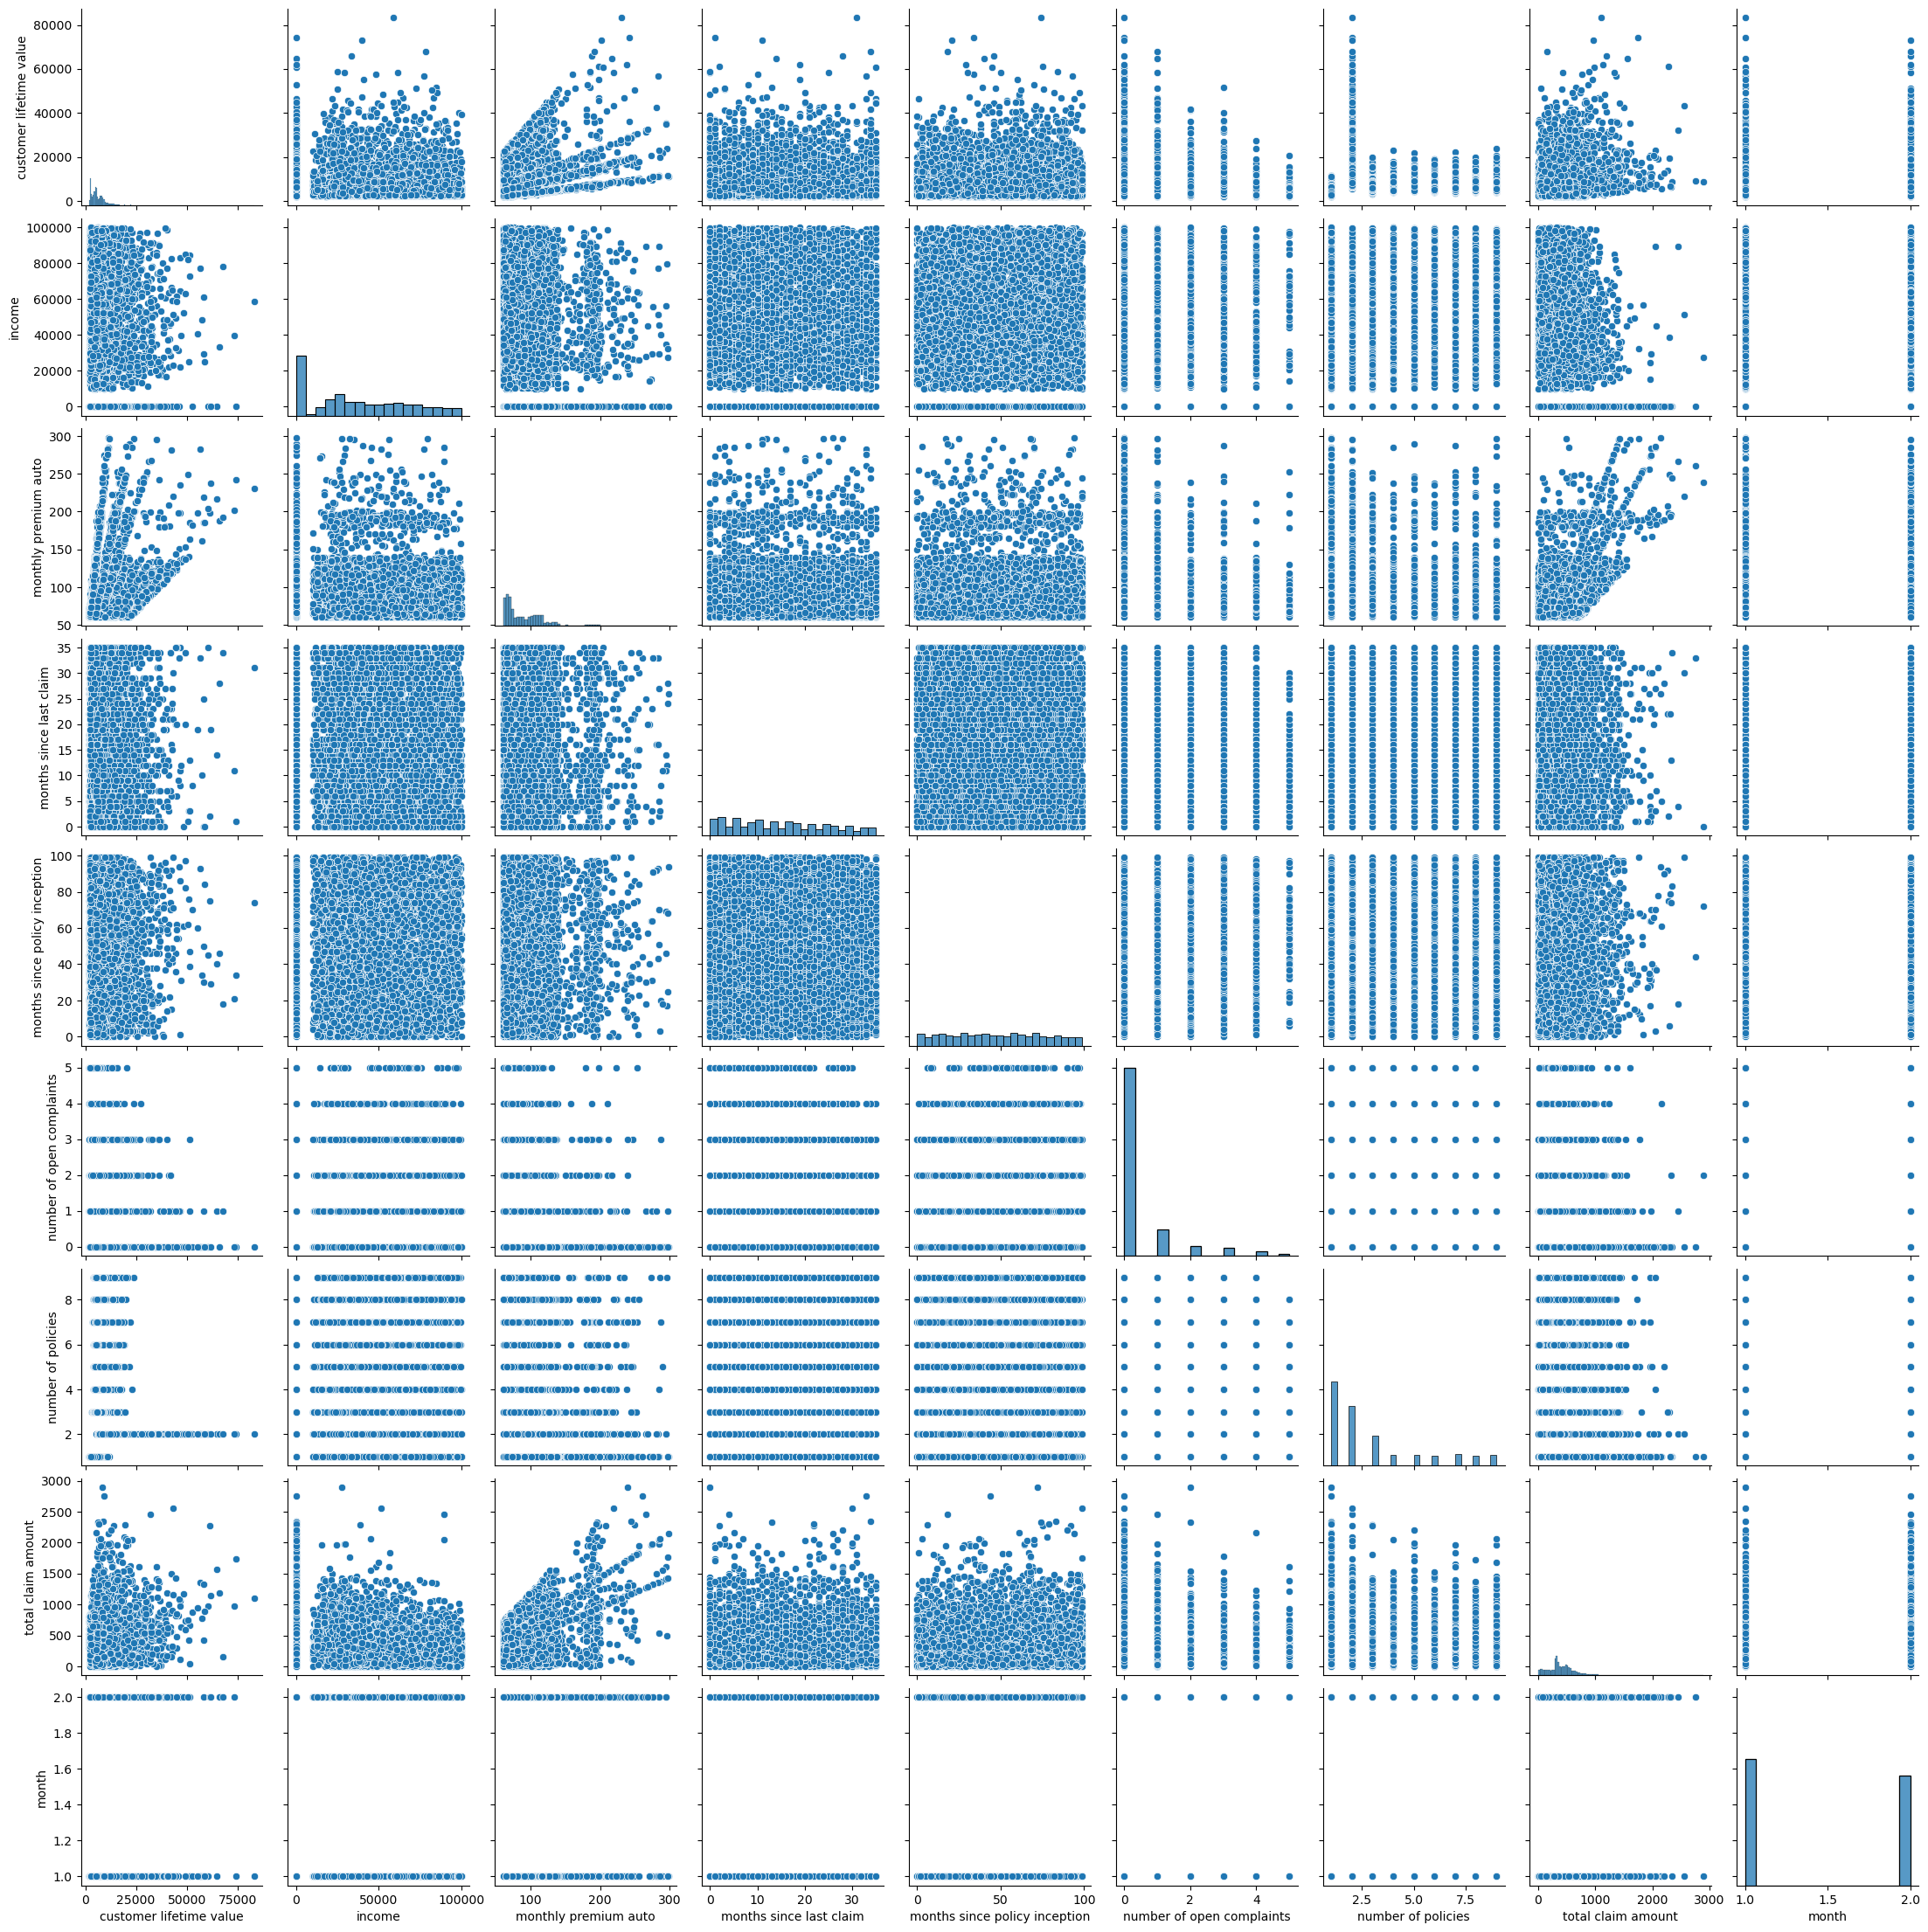

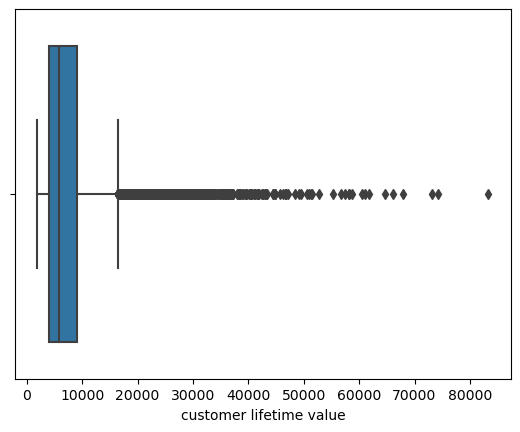

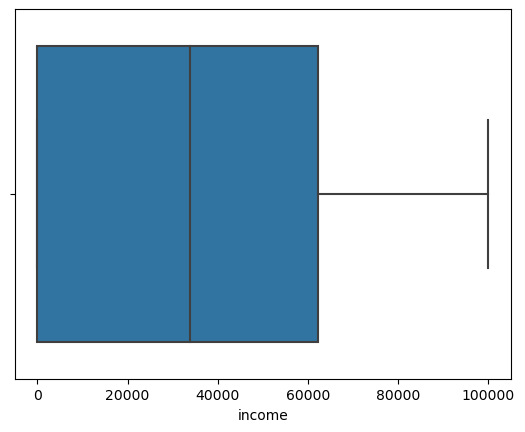

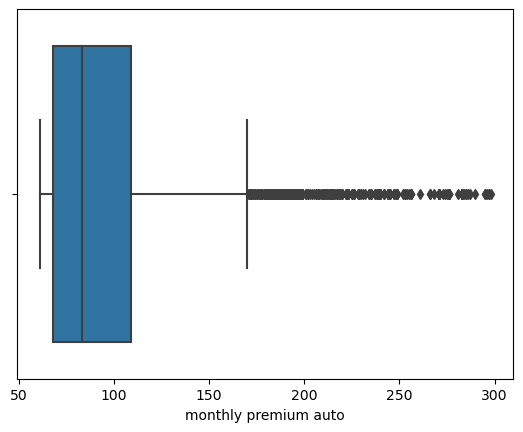

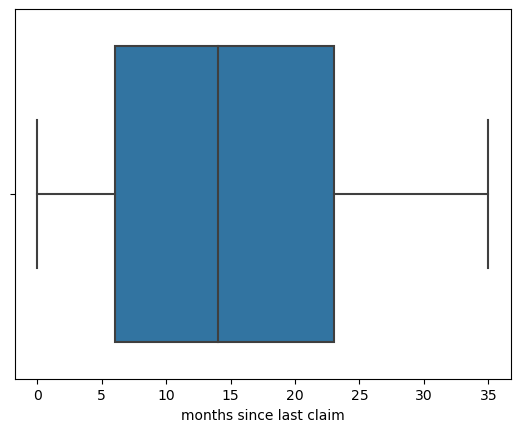

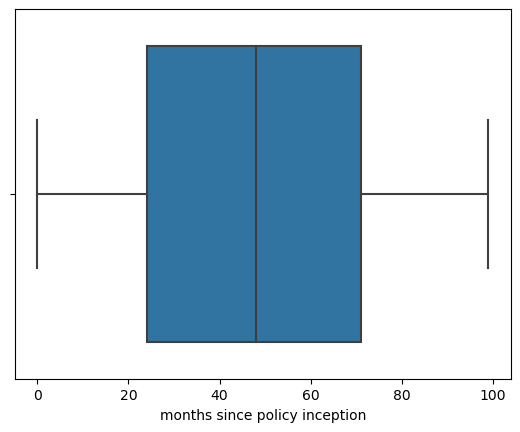

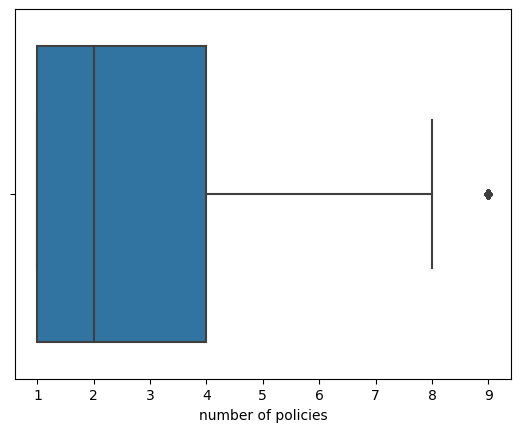

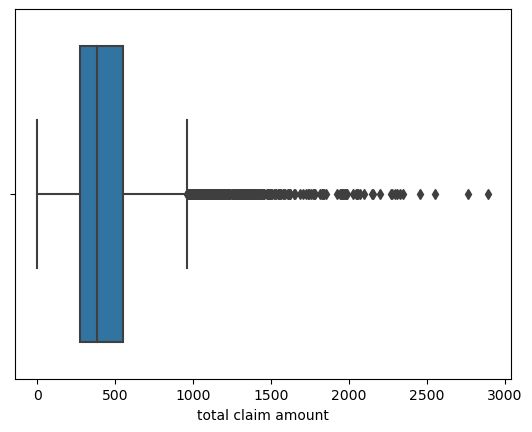

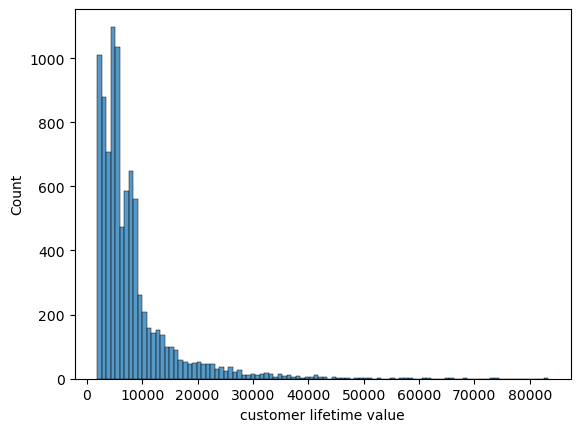

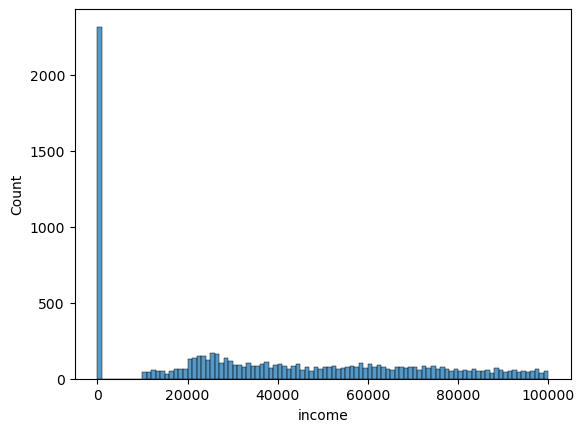

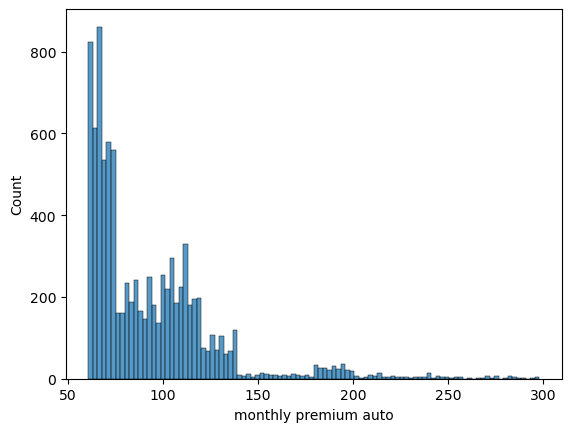

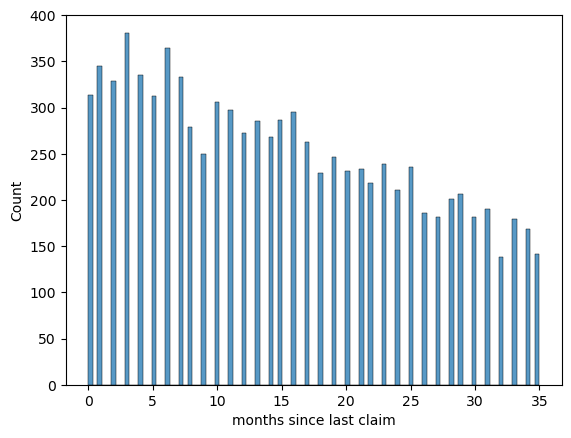

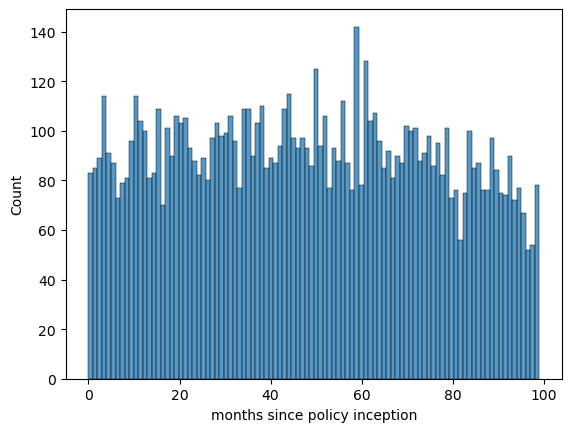

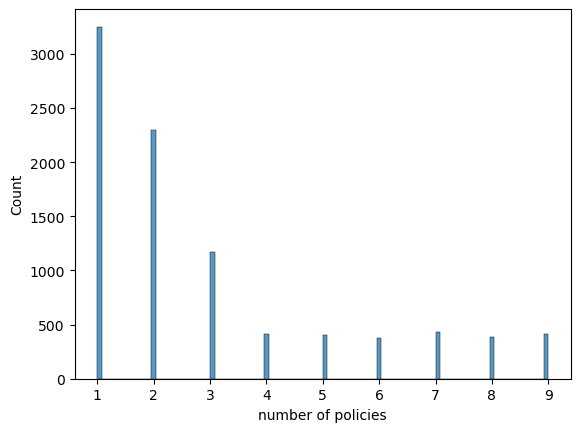

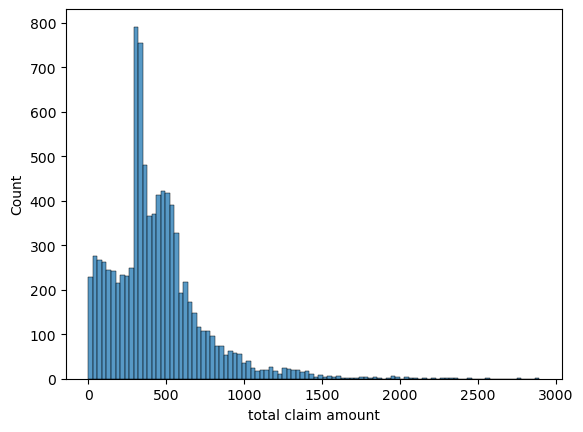

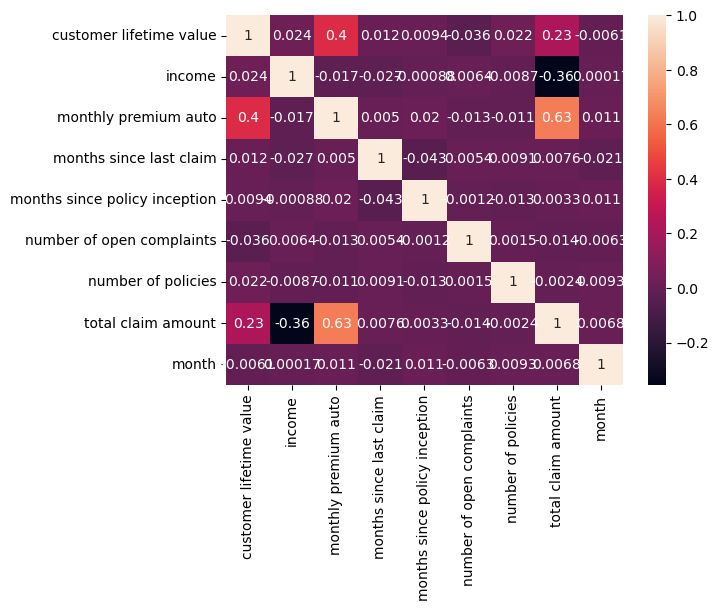

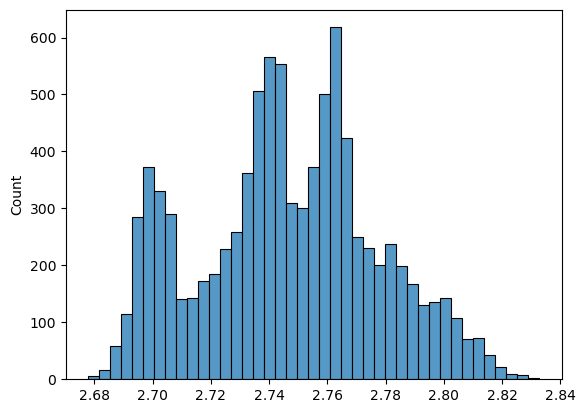

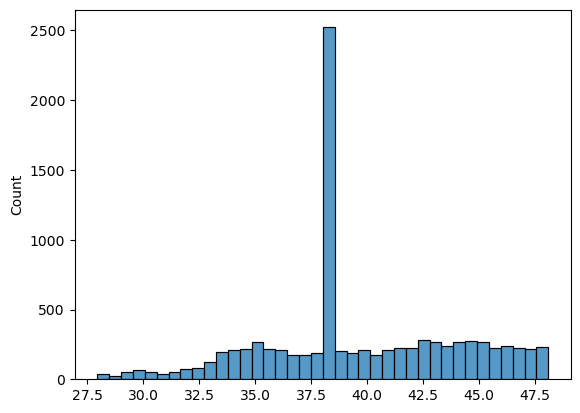

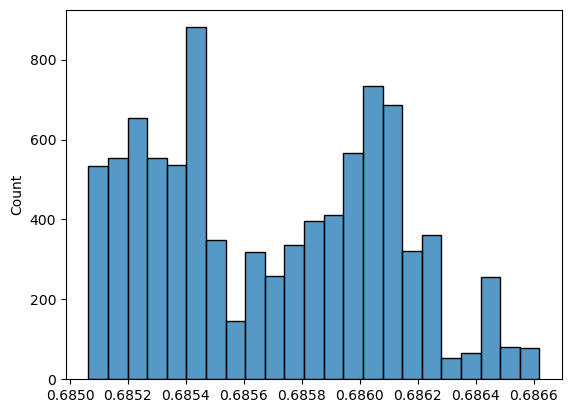

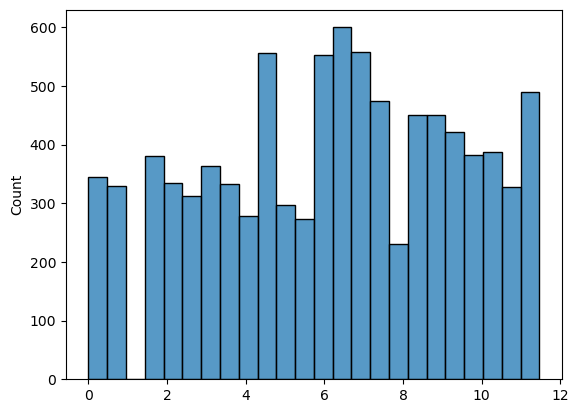

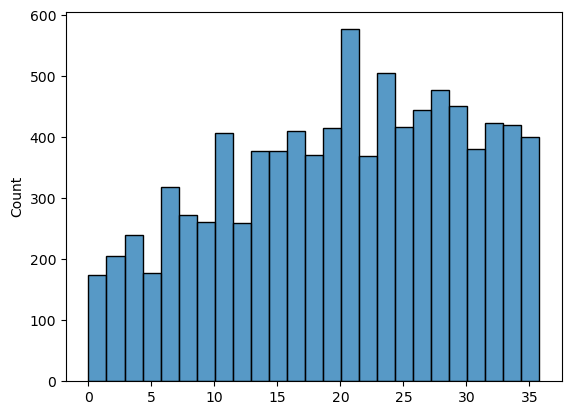

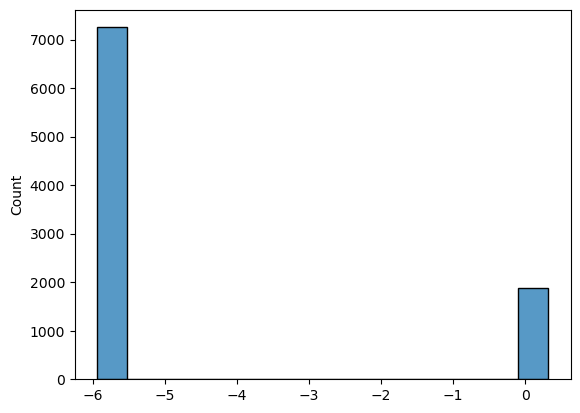

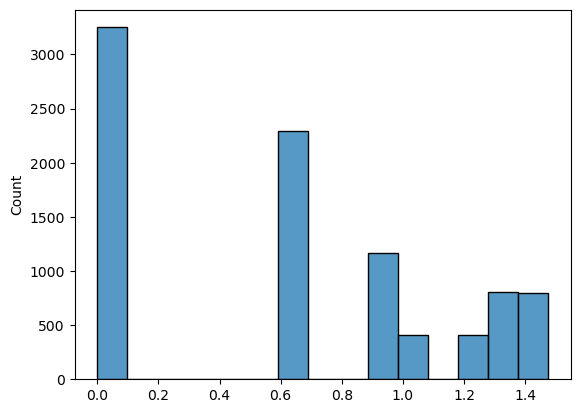

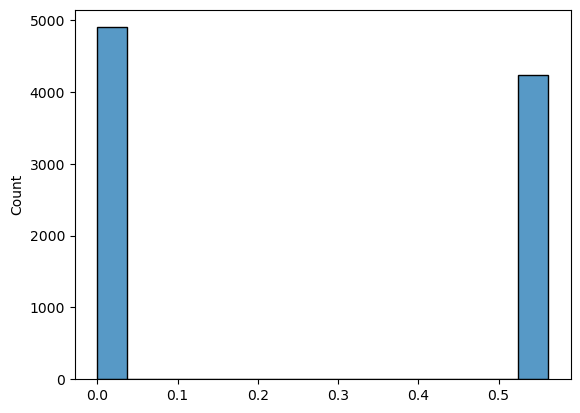

r2_score : 0.5170217148808898
mse : 38530.64595133634
rmse: 196.29224628430012
mae:  142.12262692708723


In [60]:
dealing_data(data)